## Maintenance Fines in Detroit with GradientBoostingClassifier

One of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this example, the task is to predict whether a given blight ticket will be paid on time.

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


#reading data!
df = pd.read_csv('train.csv', encoding = 'ISO-8859-1')
print(df.columns)

#---- preprocesing train data
df2 = df[(df['compliance'] == 0.0) | (df['compliance'] == 1.0)]
X = df2.loc[: , 'ticket_id': 'judgment_amount']
X['grafitti_status'] = df2['grafitti_status']


#eliminate > to avoid errors in LabelEncoder
X['mailing_address_str_name'] = X['mailing_address_str_name'].str.replace(r"\>"," ")
X['violator_name'] = X['violator_name'].str.replace(r"\>"," ")


#replace NaN to ''
X = X.fillna('')


# encode labels with value for avoid errors in fit
encoder = preprocessing.LabelEncoder()
categorical = list(X.select_dtypes(include=['object']).columns.values)
for cat in categorical:
    #print(cat)
    X[cat] = encoder.fit_transform(X[cat].astype(str))

#obtain y_train
y = df2['compliance']


#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#create the model
clf =  GradientBoostingClassifier(n_estimators = 40
                                  ,max_depth = 5
                                  ,learning_rate= 0.3)
clf = clf.fit(X_train, y_train)



/home/adrian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')


## Plot ROC curve

<IPython.core.display.Javascript object>


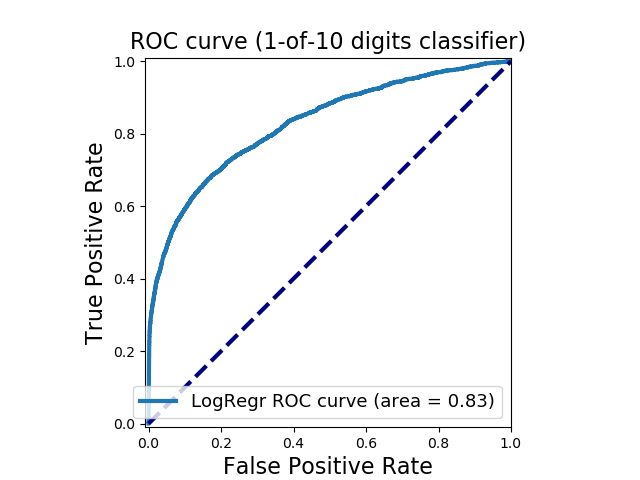

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_score_lr = clf.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


## Feature importance

The Names of top 5 features are: ['late_fee', 'disposition', 'discount_amount', 'hearing_date', 'judgment_amount']


<IPython.core.display.Javascript object>


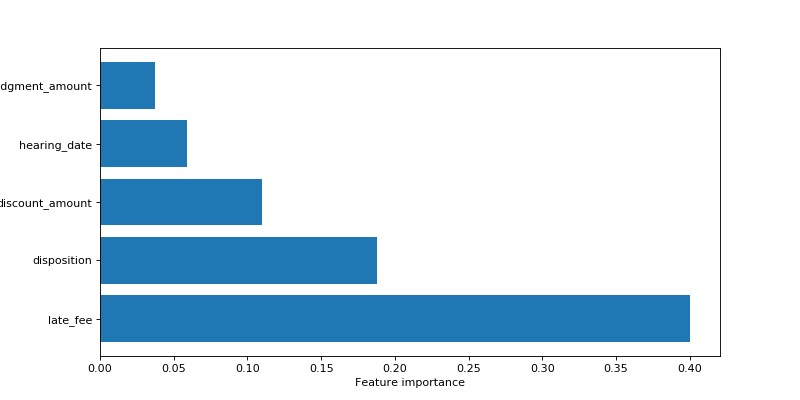

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt




df = pd.Series(data = clf.feature_importances_
                  , index = X_train.columns
                  , name = 'Importances').sort_values(ascending= False)
dfTop5= df[:5]
dfTop5Names = dfTop5.index.tolist()
print("The Names of top 5 features are:", dfTop5Names)

#plot the top 5 of the features
plt.figure(figsize=(10,5), dpi=80)

feature_names = dfTop5Names
c_features = len(feature_names)
plt.barh(range(c_features), dfTop5)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), feature_names)

plt.show()




